In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np

from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import cv2
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
import glob
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


In [2]:
# load_weights only sets the weights of your network. You still need to define its architecture before calling load_weights:

In [3]:
facenetmodel=load_model("../input/facenet-keras/facenet_keras.h5")

/opt/conda/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
#facenetmodel.summary()

In [5]:
model1=Model(facenetmodel.input,facenetmodel.layers[-4].output)   #very unique way remember this

In [6]:
#model1.summary()

In [7]:
dir1="../input/indian-actors-face-recognition/train_images/train_images/"

In [8]:
imgdir=[]
for i in glob.glob("../input/indian-actors-face-recognition/train_images/train_images/*"):
    
    x=glob.glob(i+"/*")
    imgdir.extend(x)

In [9]:
len(imgdir)

150

In [10]:
def load_image(path):
    #print(path)
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(160,160))
    return img

In [11]:
xtrain=[]
dict1={'SRK':[],'SLK':[],'AIR':[],'ALB':[],'AMB':[]}
for i in range(len(imgdir)):
    if 'SRK' in imgdir[i]:
        
        dict1['SRK'].append(i)
    elif 'SLK' in imgdir[i]:
        dict1['SLK'].append(i)
    
    elif 'AIR' in imgdir[i]:
        dict1['AIR'].append(i)
        
    elif 'ALB' in imgdir[i]:
        dict1['ALB'].append(i)
        
    elif 'AMB' in imgdir[i]:
        dict1['AMB'].append(i)
        
    xtrain.append(load_image(imgdir[i]))

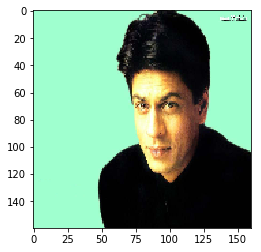

In [12]:
plt.imshow(xtrain[0])

In [13]:
plt.imshow(xtrain1[3])

NameError: name 'xtrain1' is not defined

In [14]:
#Standardizing images
mean=np.mean(xtrain,axis=0)
std=np.std(xtrain,axis=0)
xtrainstandardize=(xtrain-mean)/std

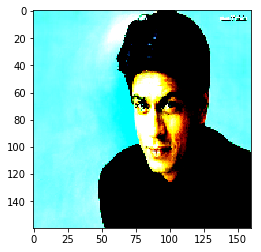

In [15]:
plt.imshow(xtrainstandardize[0])

In [16]:
encodings=model1.predict(xtrainstandardize)

In [17]:
def l2norm(enc1,enc2):
    return np.linalg.norm(enc1-enc2)

In [18]:
def topfive(enc,num):
    x=[]
    for i in range(len(encodings)):
        x.append((i,l2norm(encodings[enc],encodings[i])))
    p=sorted(x,key=lambda x:x[1])
    idx=[x[0] for x in p[:num]]
    #print("Actual Image")
    plt.imshow(xtrain[enc])

    fig,axes=plt.subplots(nrows=1,ncols=num,figsize=(30,30))
    #fig.set_figheight=100
    #fig.set_figwidth=100
    for i in range(num):
        axes[i].imshow(xtrain[idx[i]])


In [19]:
#Encodings for different images
enclist=[86,]

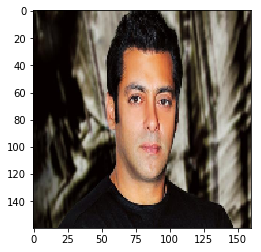

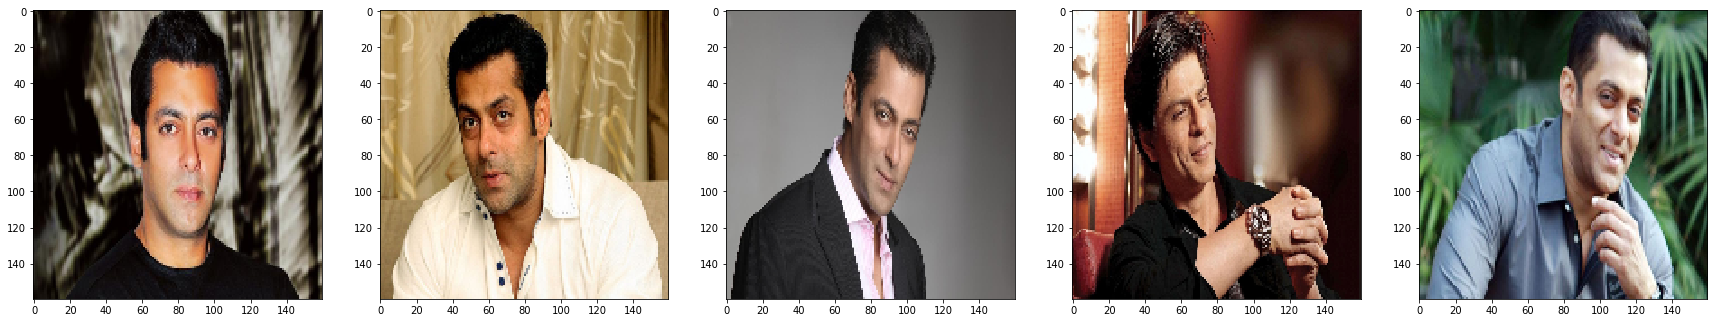

In [20]:
topfive(100,5)

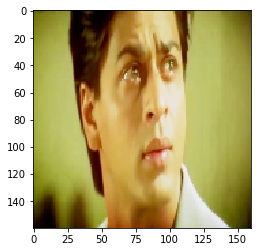

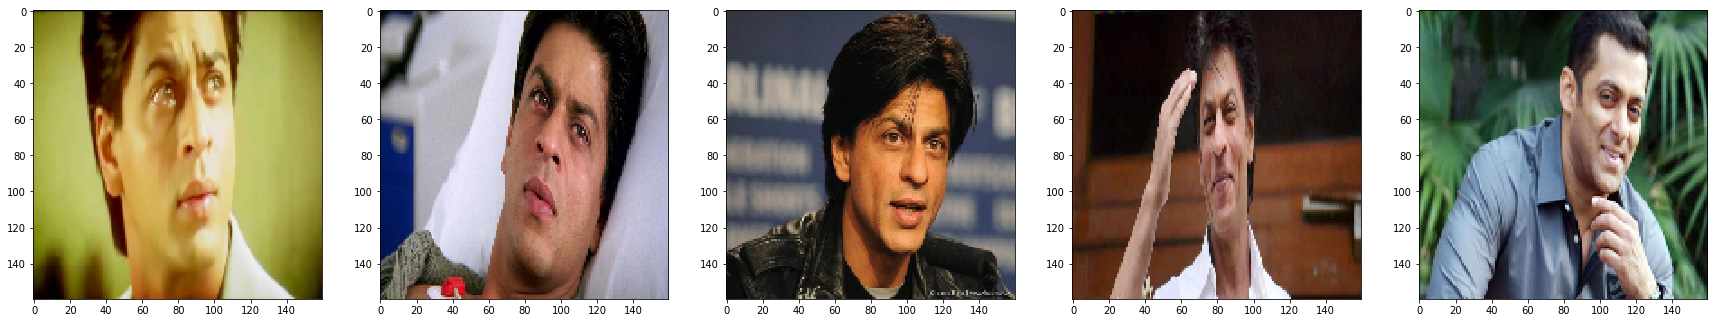

In [21]:
topfive(23,5)

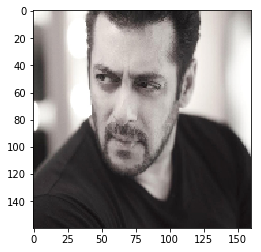

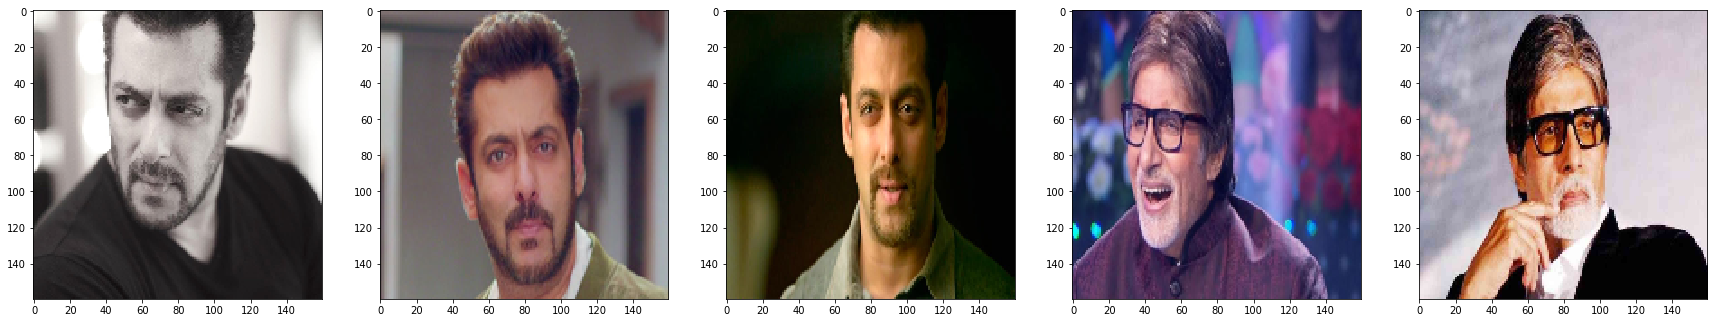

In [22]:
topfive(117,5)

In [23]:
# Using intermediate layer for CBIR
#Model2

In [24]:
#facenetmodel.summary()

In [25]:
model=Model(facenetmodel.input,GlobalAveragePooling2D()(facenetmodel.layers[-111].output))

In [26]:
#model.summary()

In [27]:
encodings2=model.predict(xtrainstandardize)

In [28]:
def topfive(enc,num):
    x=[]
    for i in range(len(encodings2)):
        x.append((i,l2norm(encodings2[enc],encodings2[i])))
    p=sorted(x,key=lambda x:x[1])
    idx=[x[0] for x in p[:num]]
    #print("Actual Image")
    plt.imshow(xtrain[enc])

    fig,axes=plt.subplots(nrows=1,ncols=num,figsize=(30,30))
    #fig.set_figheight=100
    #fig.set_figwidth=100
    for i in range(num):
        axes[i].imshow(xtrain[idx[i]])


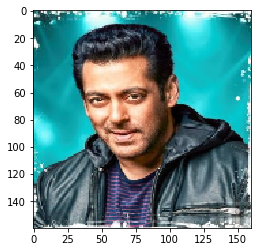

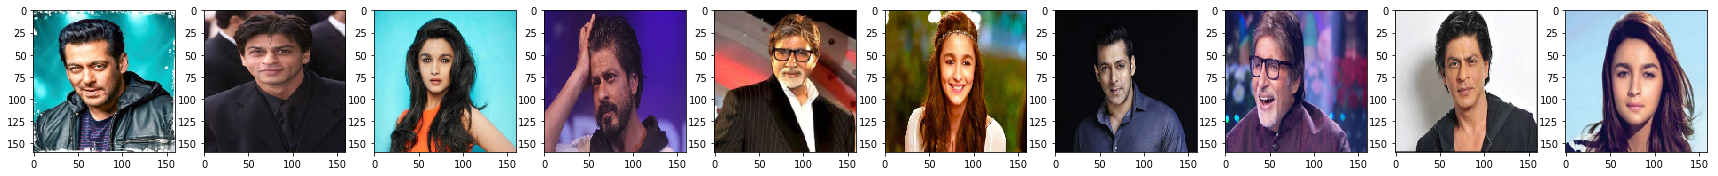

In [29]:
topfive(103,10)  #We can see Here same background Colors images are coming more often
# As Inner layers of Deep Learning Model learns more general features like content and stuff

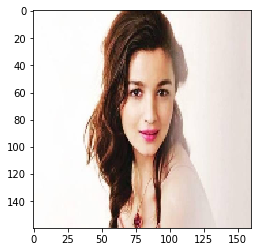

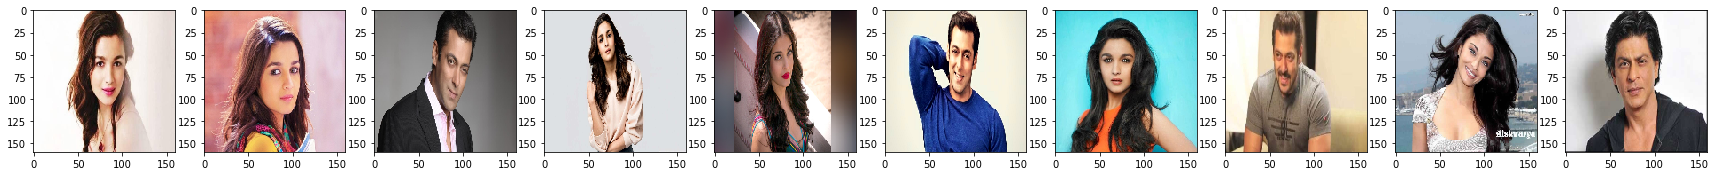

In [30]:
topfive(135,10)